In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


from pylab import rcParams
rcParams['figure.figsize'] = 12, 6


%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)


from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from ggplot import *

In [47]:
player_stats = pd.read_csv('player_stats.csv', sep = ",")
len(player_stats)

4601

-----------------------------

## t-SNE dimensions players stats from positions

In [61]:
player_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 78 columns):
acceleration       4601 non-null int64
aggression         4601 non-null int64
agility            4601 non-null int64
balance            4601 non-null int64
ball               4601 non-null int64
composure          4601 non-null int64
crossing           4601 non-null int64
curve              4601 non-null int64
defending          4601 non-null int64
diving             4601 non-null int64
dribbling          4601 non-null int64
finishing          4601 non-null int64
fk                 4601 non-null int64
handling           4601 non-null int64
heading            4601 non-null int64
interceptions      4601 non-null int64
jumping            4601 non-null int64
kicking            4601 non-null int64
long               4601 non-null int64
marking            4601 non-null int64
pace               4601 non-null int64
passing            4601 non-null int64
penalties          4601 non-null in

In [160]:
#test = player_stats[["pace","shooting","passing","defending","physicality",\
#                     "position"]].sample(frac=1).reset_index(drop=True)
test = player_stats[['pace', 'acceleration', 'sprint', 'shooting', 'positioning', 'finishing', \
                     'shot', 'long', 'volleys', 'penalties','dribbling', 'agility', 'balance',\
                     'reactions', 'ball', 'dribbling', 'defending', 'interceptions', 'heading', 'marking',\
                     'standing', 'sliding', 'passing', 'vision', 'crossing', 'fk', 'short', 'long', 'curve',\
                     'physicality', 'jumping', 'stamina', 'strength', 'aggression', 'composure', \
                     'position', 'player_id']].sample(frac=1).reset_index(drop=True)

In [161]:
len(test)

4601

In [162]:
d = {'CF': 1,
          'CB': 2,
          'LB': 3,
          'CDM': 4,
          'ST': 5, 
          'RW': 6,
          'GK': 7,
          'CM': 8,
          'CAM': 9, 
          'RB': 10,
          'LWB': 11, 
          'LW': 12, 
          'RM': 13, 
          'RWB': 14,
          'LM': 15, 
        } 
test['position']= test['position'].map(d)

In [163]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test)

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300, random_state = 22,init='pca')
tsne_representation = tsne.fit_transform(X_scaled)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4601
[t-SNE] Computed conditional probabilities for sample 2000 / 4601
[t-SNE] Computed conditional probabilities for sample 3000 / 4601
[t-SNE] Computed conditional probabilities for sample 4000 / 4601
[t-SNE] Computed conditional probabilities for sample 4601 / 4601
[t-SNE] Mean sigma: 1.417256
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.854014
[t-SNE] Error after 125 iterations: 0.854014


In [164]:
d = {1:'CF', 
          2:'CB',
          3:'LB',
          4:'CDM', 
          5: 'ST', 
          6:'RW', 
          7:'GK', 
          8:'CM', 
          9:'CAM', 
          10:'RB',
          11:'LWB', 
          12:'LW', 
          13:'RM', 
          14:'RWB', 
          15:'LM'
        } 
df_tsne = test.copy()

df_tsne['position']= df_tsne['position'].map(d)

In [165]:
df_tsne = pd.merge(df_tsne, player_stats[['name','overall_score','player_id',"revision"]], how = 'left', on = 'player_id')

In [175]:
df_tsne.loc[df_tsne['overall_score']<88, 'name'] = ""
df_tsne.loc[df_tsne['revision']!="Normal", 'name'] = ""

In [176]:
len(df_tsne[(df_tsne['name']!="")])

35

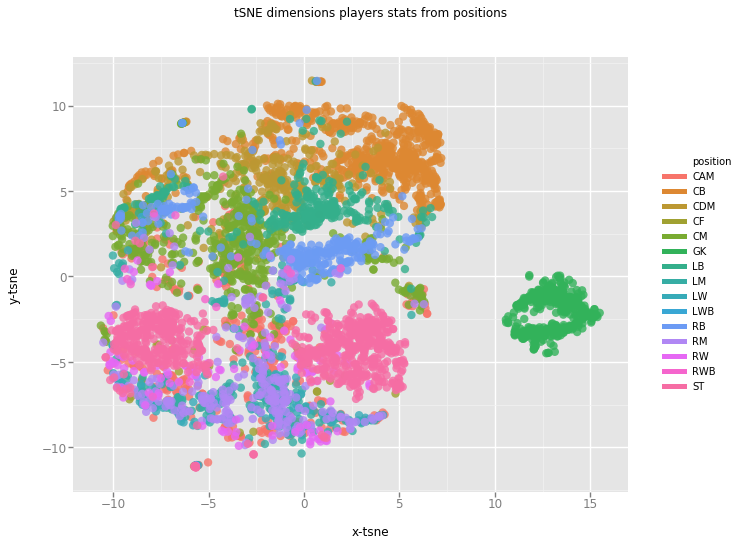

<ggplot: (62304397)>

In [181]:
df_tsne['x-tsne'] = tsne_representation[:,0]
df_tsne['y-tsne'] = tsne_representation[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='position') ) \
        + geom_point(size=70,alpha=0.8) \
        + ggtitle("tSNE dimensions players stats from positions")
chart

## Stats by group positions

In [68]:
df_tsne[df_tsne['position']== 'GK']['position'] = 'Goalkeepers'
df_tsne[(df_tsne['position']== 'LW')| (df_tsne['position']== 'CF') |\
           (df_tsne['position']== 'RW')| (df_tsne['position']== 'ST')]['position']  = 'Forwards'

df_tsne[(df_tsne['position']== 'CAM')| (df_tsne['position']== 'CDM') |\
        (df_tsne['position']== 'CM')| (df_tsne['position']== 'LM')| \
        (df_tsne['position']== 'RM')]['position']  = 'Midfielders'

df_tsne[(df_tsne['position']== 'LWB')| (df_tsne['position']== 'LB') |\
           (df_tsne['position']== 'RWB')| (df_tsne['position']== 'RB')| (df_tsne['position']== 'CB')]['position']  = 'Backs'

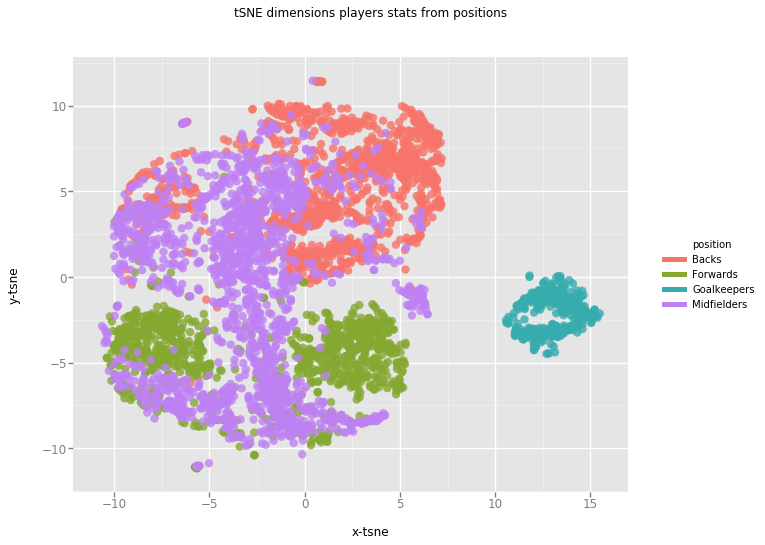

<ggplot: (-9223372036843959969)>

In [71]:
df_tsne['x-tsne'] = tsne_representation[:,0]
df_tsne['y-tsne'] = tsne_representation[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='position') ) \
        + geom_point(size=70,alpha=0.8) \
        + ggtitle("tSNE dimensions players stats from positions")
chart